# Diabetes prediction 

A diabetes dataset is given to me which has only pregnant women's data. I am required to build a Machine Learning model which will predict for future pregnant ladies about whether they have diabetes or not.


***The following are the features present in the dataset:***

***Pregnancies:*** Number of times pregnant

***Glucose:*** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

***BloodPressure:*** Diastolic blood pressure (mm Hg)

***SkinThickness:*** Triceps skin fold thickness (mm)

***Insulin:*** 2-Hour serum insulin (mu U/ml)

***BMI:*** Body mass index (weight in kg/(height in m)^2)

***DiabetesPedigreeFunction:*** Diabetes pedigree function

***Age:*** Age (years)

***Outcome:*** Class variable (0 or 1)


In [1]:
#First the required libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest 


In [2]:
diabetes = pd.read_csv(r"E:\Data Analyst Journey\Projects\Meriskill\Project 2 - Diabetes Data\diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1.Data Cleaning

Checking for Null values

In [4]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes.duplicated().sum()

0

As shown above no null values or duplicate values
are present.

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Outlier Detection

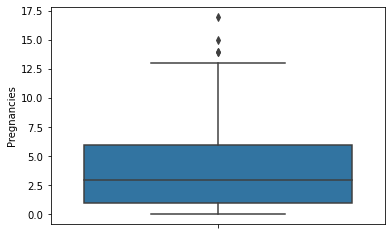

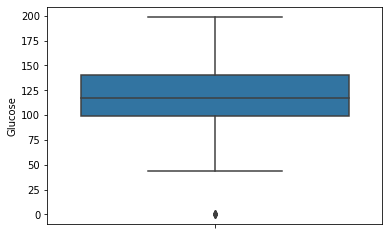

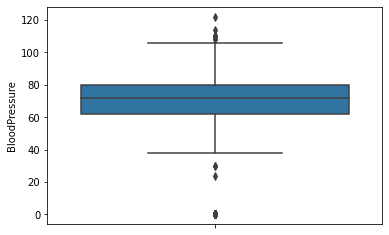

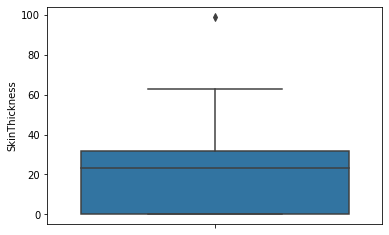

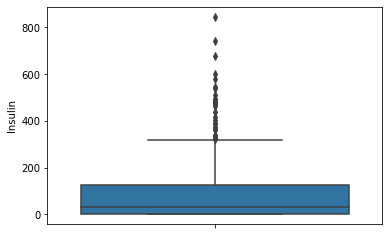

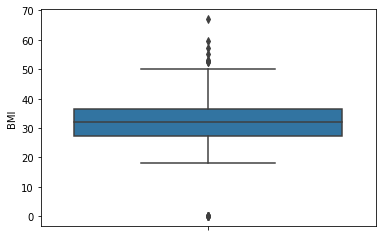

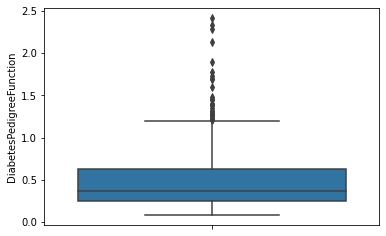

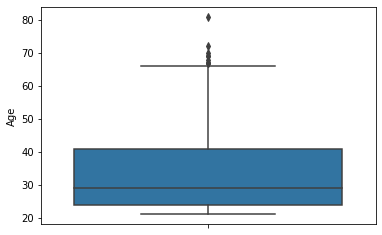

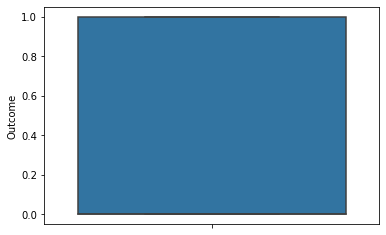

In [8]:
for i in diabetes.select_dtypes(np.number).columns:
    plt.figure()
    sns.boxplot( y = i,data = diabetes)

### defining a function to remove outliers from the dataset.

In [9]:
def outlier_removal(column):
    Q1=diabetes[column].quantile(0.25)
    Q3=diabetes[column].quantile(0.75)
    IQR = Q3-Q1
    global UB,LB
    UB = Q3+1.5*IQR
    LB = Q1-1.5*IQR
    print(f"For {column} column the IQR value is:{IQR} ")
    print(f"For {column} column the UB  value is:{UB} ")
    print(f"For {column} column the LB  value is:{LB} ")
    diabetes[column]=np.where(diabetes[column]>UB,UB,np.where(diabetes[column]<LB,LB,diabetes[column]))

In [10]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
outlier_removal('Pregnancies')

For Pregnancies column the IQR value is:5.0 
For Pregnancies column the UB  value is:13.5 
For Pregnancies column the LB  value is:-6.5 


In [12]:
diabetes.loc[diabetes['Glucose']==0 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,0,48,20,0,24.7,0.140,22,0
182,1.0,0,74,20,23,27.7,0.299,21,0
342,1.0,0,68,35,0,32.0,0.389,22,0
349,5.0,0,80,32,0,41.0,0.346,37,1
502,6.0,0,68,41,0,39.0,0.727,41,1


In [13]:
## Dropping the rows where Glucose value is 0
diabetes.drop(diabetes.loc[diabetes['Glucose']==0].index,inplace = True)

In [14]:
#Dropping rows where Bloodpresuure value is below 60
diabetes.drop(diabetes.loc[diabetes['BloodPressure']==0].index,inplace = True)

***Skinthickness cant be 100 show the outlier must be removed***

In [15]:
diabetes.loc[diabetes['SkinThickness']>90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2.0,197,70,99,0,34.7,0.575,62,1


In [16]:
diabetes.drop(diabetes.loc[diabetes['SkinThickness']>90].index,inplace = True)

In [17]:
diabetes.loc[diabetes['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8.0,183,64,0,0,23.3,0.672,32,1
5,5.0,116,74,0,0,25.6,0.201,30,0
9,8.0,125,96,0,0,0.0,0.232,54,1
10,4.0,110,92,0,0,37.6,0.191,30,0
11,10.0,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
757,0.0,123,72,0,0,36.3,0.258,52,1
758,1.0,106,76,0,0,37.5,0.197,26,0
759,6.0,190,92,0,0,35.5,0.278,66,1
762,9.0,89,62,0,0,22.5,0.142,33,0


***Also Skinthickness can't be Zero so is is replaced by the median value***

In [18]:
diabetes['SkinThickness']=np.where(diabetes['SkinThickness']==0,diabetes['SkinThickness'].median(),diabetes['SkinThickness'])

*** Replacing the insulin values with median values ***

***Defining a function that will found out the outliers and replace them with median values***

In [19]:
def outier_replace(column, replace = False):
    q1=diabetes[column].quantile(0.25)
    q3=diabetes[column].quantile(0.75)
    iqr = q3-q1
    global ub,lb
    ub = q3+1.5*iqr
    lb = q1-1.5*iqr
    print(f"For {column} column the IQR value is:{iqr} ")
    print(f"For {column} column the UB  value is:{ub} ")
    print(f"For {column} column the LB  value is:{lb} ")
    median=diabetes[column].median()
    print(f"For {column} column the median value is:{median} ")
    diabetes[column]=np.where(diabetes[column]>ub,median,np.where(diabetes[column]<lb,median,diabetes[column]))

In [20]:
outier_replace('Insulin')

For Insulin column the IQR value is:130.0 
For Insulin column the UB  value is:325.0 
For Insulin column the LB  value is:-195.0 
For Insulin column the median value is:48.0 


In [21]:
outier_replace('BMI')

For BMI column the IQR value is:9.200000000000003 
For BMI column the UB  value is:50.400000000000006 
For BMI column the LB  value is:13.599999999999994 
For BMI column the median value is:32.3 


In [22]:
outier_replace('DiabetesPedigreeFunction')

For DiabetesPedigreeFunction column the IQR value is:0.385 
For DiabetesPedigreeFunction column the UB  value is:1.2075 
For DiabetesPedigreeFunction column the LB  value is:-0.3325 
For DiabetesPedigreeFunction column the median value is:0.38 


In [23]:
outlier_removal('Age')

For Age column the IQR value is:17.0 
For Age column the UB  value is:66.5 
For Age column the LB  value is:-1.5 


In [24]:
outlier_removal('BloodPressure')

For BloodPressure column the IQR value is:16.0 
For BloodPressure column the UB  value is:104.0 
For BloodPressure column the LB  value is:40.0 


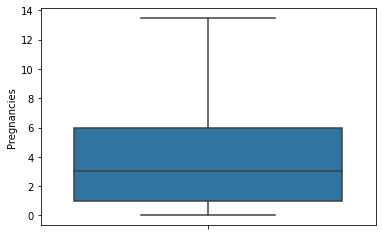

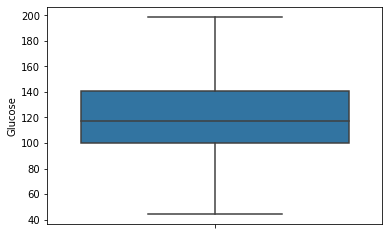

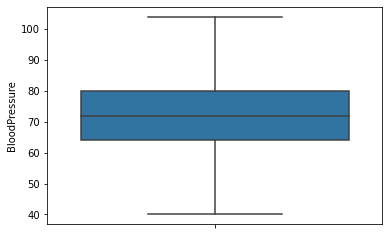

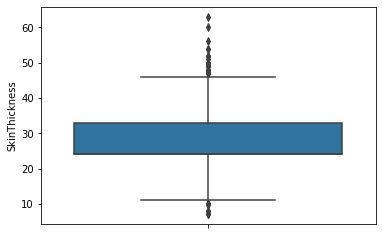

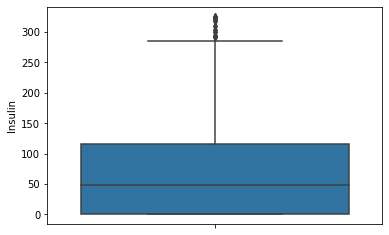

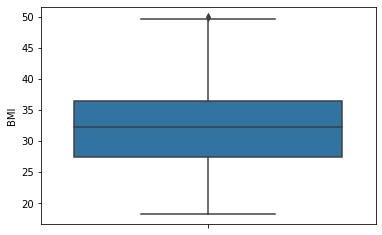

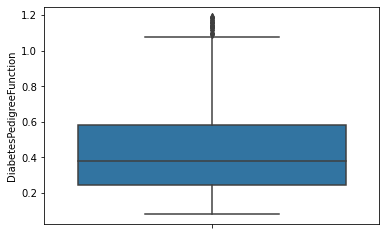

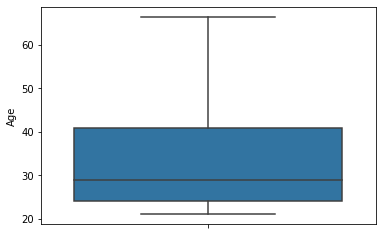

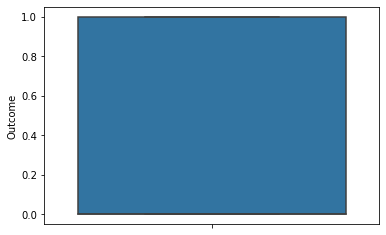

In [25]:
for i in diabetes.select_dtypes(np.number).columns:
    plt.figure()
    sns.boxplot( y = i,data = diabetes)

In [26]:
diabetes_cleaned=diabetes.copy()

In [27]:
diabetes_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,3.856946,121.770289,72.411279,27.686382,66.660248,32.227785,0.429979,33.319120,0.342503
std,3.338176,30.573279,11.982427,8.906810,80.455787,6.425622,0.245070,11.695162,0.474874
min,0.000000,44.000000,40.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,24.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,116.000000,36.400000,0.583000,41.000000,1.000000
max,13.500000,199.000000,104.000000,63.000000,325.000000,50.000000,1.191000,66.500000,1.000000


# Exploratory Data Analysis

Here we will understand the relations that input columns have with the output columns.

### Univariate Analysis

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

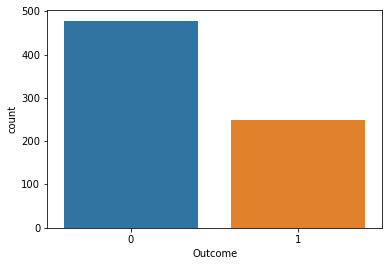

In [28]:
sns.countplot(diabetes['Outcome'])

#### Checking for Skewness

In [29]:
diabetes_cleaned.skew()

Pregnancies                 0.848345
Glucose                     0.524409
BloodPressure               0.101889
SkinThickness               0.617028
Insulin                     1.103980
BMI                         0.257447
DiabetesPedigreeFunction    0.960786
Age                         1.037838
Outcome                     0.665150
dtype: float64

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between ***0.5 and 1, the distribution is moderately skewed.*** If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

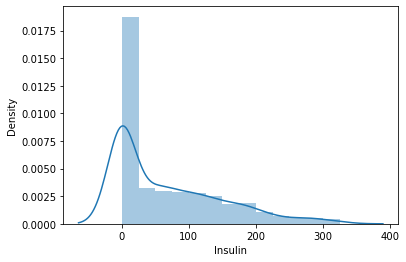

In [30]:
sns.distplot(diabetes_cleaned['Insulin'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

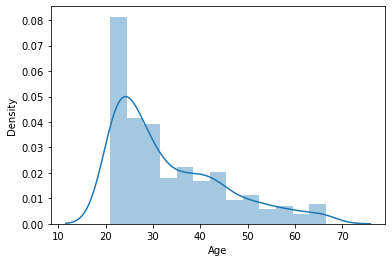

In [31]:
sns.distplot(diabetes_cleaned['Age'])

### Multivariate Analysis

Bivariate analysis is a statistical method used to examine the relationship between two different variables or sets of data. It focuses on understanding how changes in one variable are associated with changes in another.

In [32]:
diabetes_cleaned.corr(method ='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.137204,0.215009,0.041434,-0.084505,0.040545,0.006664,0.566329,0.227325
Glucose,0.137204,1.000000,0.226146,0.159803,0.209066,0.219946,0.075086,0.259487,0.485485
BloodPressure,0.215009,0.226146,1.000000,0.170384,-0.050046,0.277353,0.016696,0.338745,0.172981
SkinThickness,0.041434,0.159803,0.170384,1.000000,0.222459,0.557906,0.092681,0.036592,0.194122
Insulin,-0.084505,0.209066,-0.050046,0.222459,1.000000,0.187287,0.204444,-0.095857,0.111927
BMI,0.040545,0.219946,0.277353,0.557906,0.187287,1.000000,0.123072,0.049145,0.288848
DiabetesPedigreeFunction,0.006664,0.075086,0.016696,0.092681,0.204444,0.123072,1.000000,0.029415,0.151156
Age,0.566329,0.259487,0.338745,0.036592,-0.095857,0.049145,0.029415,1.000000,0.245421
Outcome,0.227325,0.485485,0.172981,0.194122,0.111927,0.288848,0.151156,0.245421,1.000000


<AxesSubplot:>

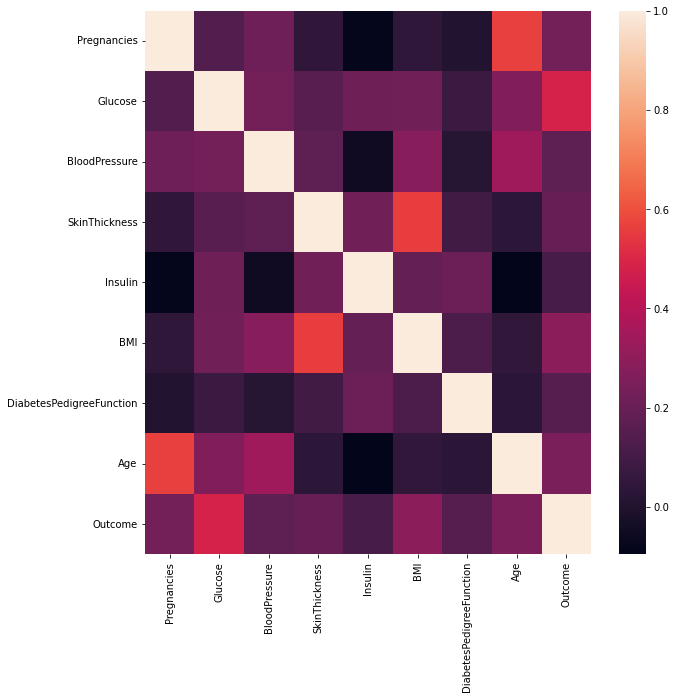

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(diabetes_cleaned.corr(method ='pearson'))

***From above it is to be understood that Glucose,BMI and Age are having high correlation values compared to others.***

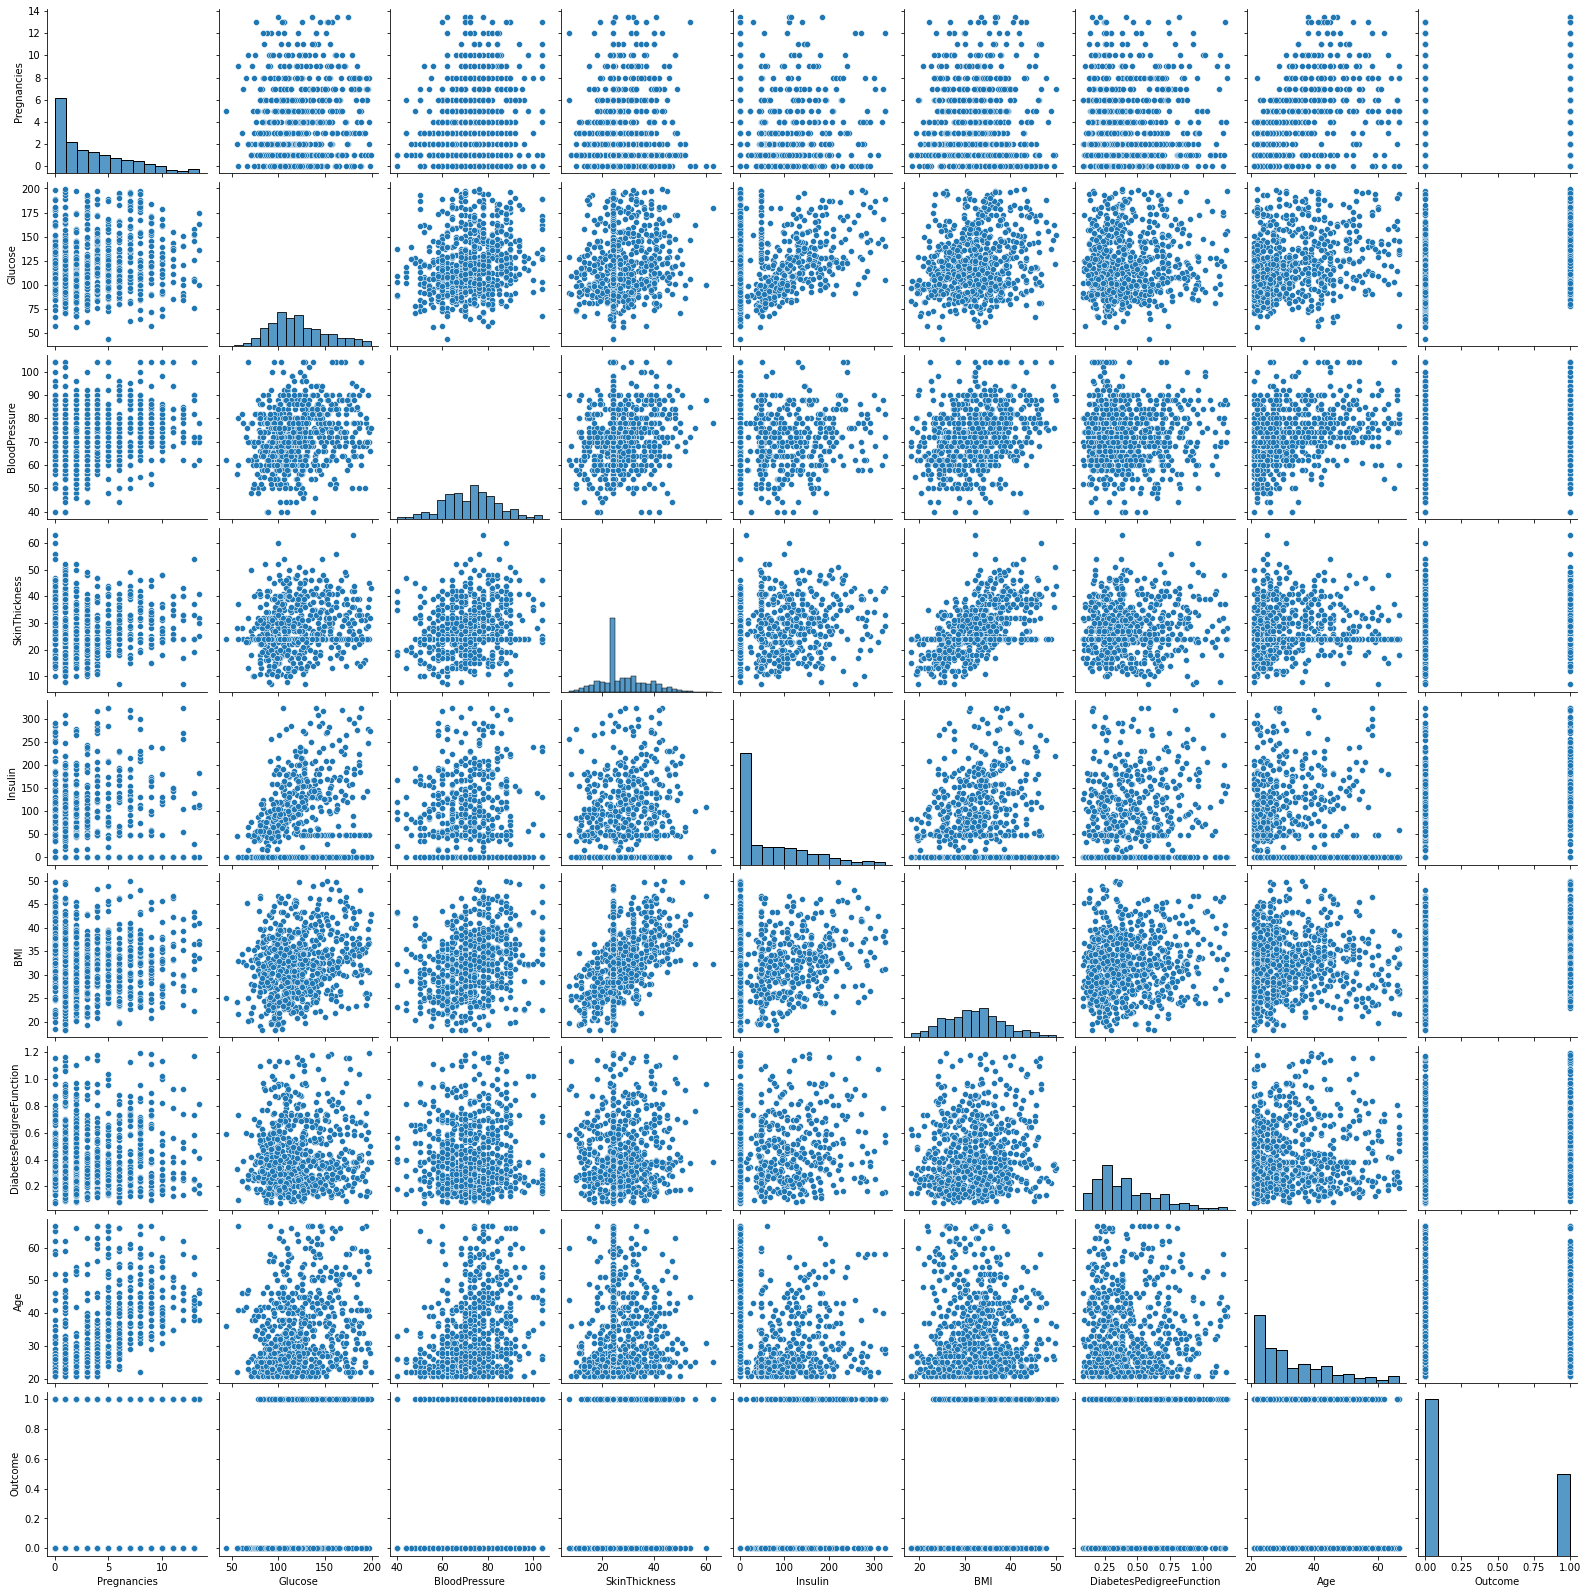

In [34]:
sns.pairplot(diabetes_cleaned)

### Bivariate Analysis

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

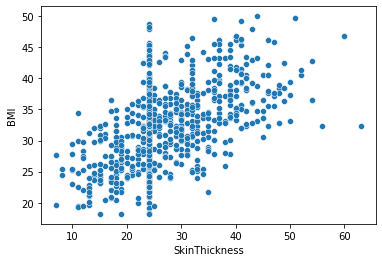

In [35]:
sns.scatterplot(x="SkinThickness",y="BMI",data=diabetes_cleaned)

In [36]:
crosstb = pd.crosstab(diabetes_cleaned.Age, diabetes_cleaned.Outcome)

In [37]:
crosstb

Outcome,0,1
Age,,
21.0,56,5
22.0,56,11
23.0,29,6
24.0,37,7
25.0,31,13
26.0,24,7
27.0,24,7
28.0,24,9
29.0,15,12


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

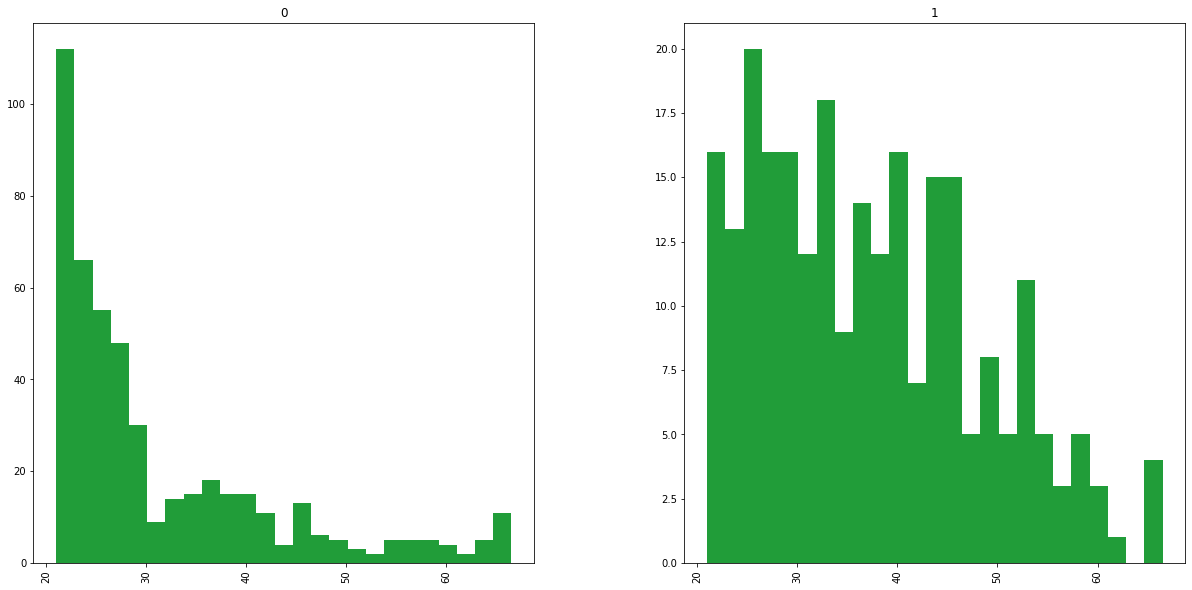

In [38]:
diabetes_cleaned.hist(column='Age',bins=25,by='Outcome',figsize=(20,10),color='#219D39')

## Feature Selection and Feature Encoding

The preceding research shows that particular features, such as ***glucose, BMI, and age*** have a greater impact on the output feature.


***As the features have numerical in nature so no need for feature encoding.***

## Modeling

Now we have our dataset ready for building a machine learning-based classifier. There are several classification models that can be used for this task. In this analysis, we will build five different types of classification models namely ***Random Forest, Decision Tree,  XGBoost and, K-Nearest Neighbors (KNN).*** These are the most popular models used for solving classification problems.

### Train-test Split

In [39]:
X=diabetes_cleaned[['Glucose','BMI','Age']]
Y=diabetes_cleaned['Outcome']
print('X shape',format(X.shape))
print('Y shape',format(Y.shape))

X shape (727, 3)
Y shape (727,)


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

#### Perform Feature Scaling
After we’ve split the dataset into training and testing sets, we’ll perform feature scaling. Feature scaling is the process of standardizing the range of features. It’s an important step because it ensures that all features are given equal importance during training.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier


In [43]:
rfc = RandomForestClassifier(n_estimators=200) 
rfc.fit(X_train, y_train)
##n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data

RandomForestClassifier(n_estimators=200)

In [44]:
#Checkiing the Accuracy
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


So here we can see that on the training dataset our model is overfitted.

In [97]:
predictions = rfc.predict(X_test)
RF=metrics.accuracy_score(y_test, predictions)
print(f"Accuracy_Score_RF is {RF}")

Accuracy_Score_RF is 0.726027397260274


In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)

In [47]:
## complete all other models with feature importance check
## See analytics vidya
#perform chi square test

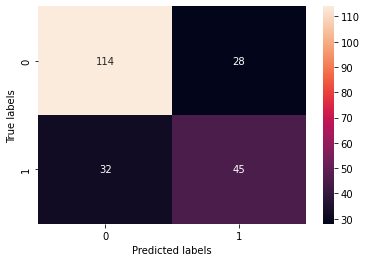

In [51]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [53]:
X_test.shape

(219, 3)

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
from sklearn import metrics
predictionsd = dtree.predict(X_test)

In [99]:
DT=metrics.accuracy_score(y_test,predictionsd)
print(f"Accuracy_Score_RF is {DT}")

Accuracy_Score_RF is 0.634703196347032


# XgBoost classifier

### Building model using XGBoost

In [77]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
xgb_pred = xgb_model.predict(X_test)

In [102]:
xgb=metrics.accuracy_score(y_test, xgb_pred)
print(f"Accuracy_Score_RF is {xgb}")

Accuracy_Score_RF is 0.6986301369863014


## Conclusion

In [110]:
model={'Model_Name': ['Random Forest','Decision tree','XGBoost'],
       'Accuracies':[RF*100,DT*100,xgb*100]}

In [114]:
Final_Result=pd.DataFrame(model)

In [115]:
Final_Result

,Model_Name,Accuracies
0,Random Forest,72.602740
1,Decision tree,63.470320
2,XGBoost,69.863014


***We can consider Random Forest for Prediction as this model is showing promising accuracy in testing.***